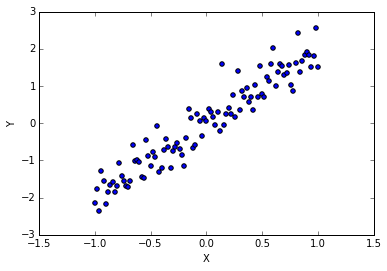

W value: 0.0000
W value: 0.9932


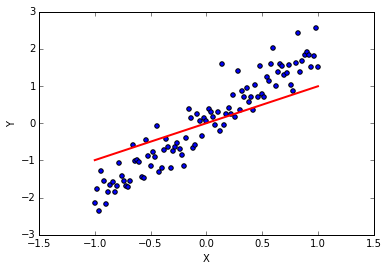

W value: 1.4909


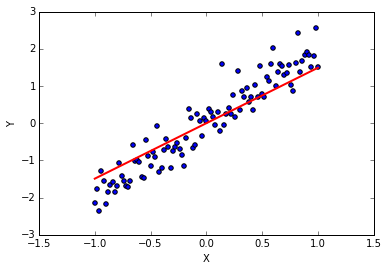

W value: 1.7402


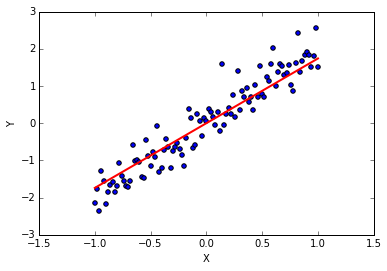

W value: 1.8652


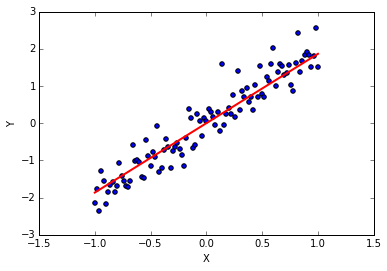

W value: 1.9278


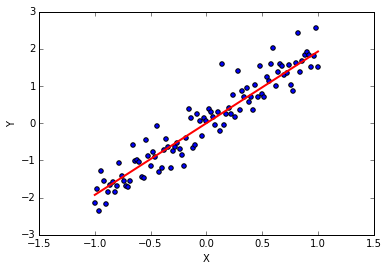

W value: 1.9592


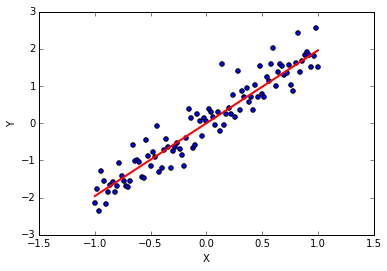

W value: 1.9749


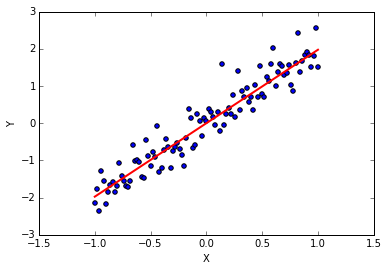

W value: 1.9827


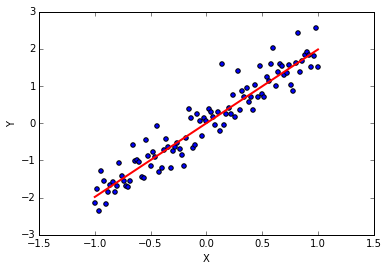

W value: 1.9867


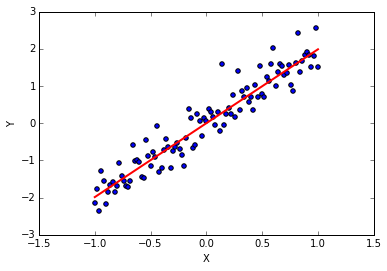

W value: 1.9887


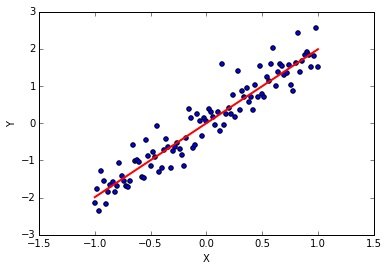

W value: 1.9897


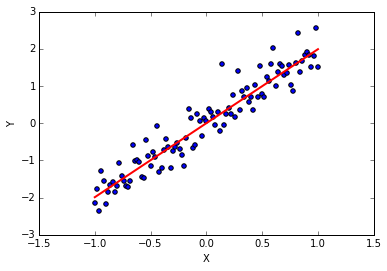

W value: 1.9902


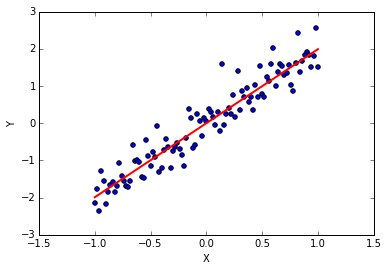

W value: 1.9904


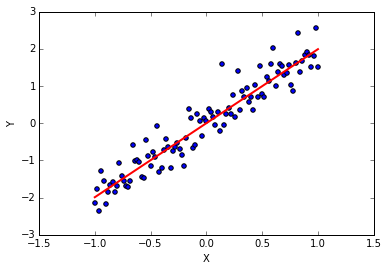

W value: 1.9905


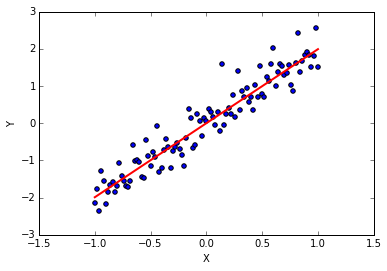

W value: 1.9906


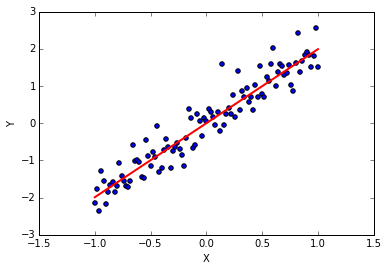

W value: 1.9906


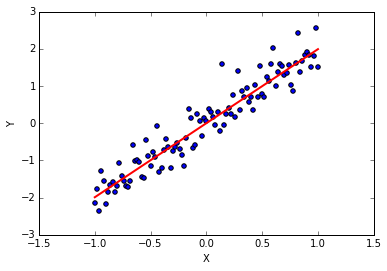

W value: 1.9906


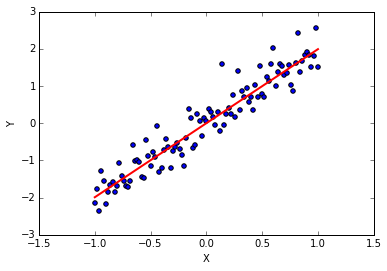

W value: 1.9906


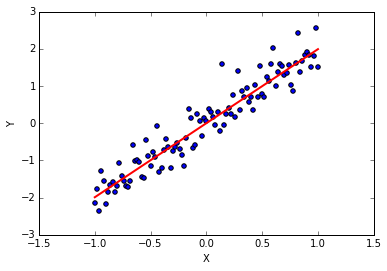

W value: 1.9906


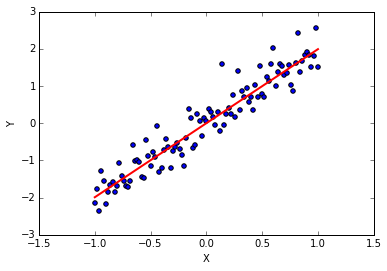

W value: 1.9907


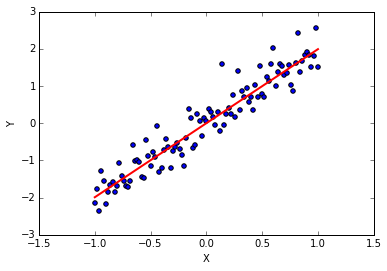

W value: 1.9907


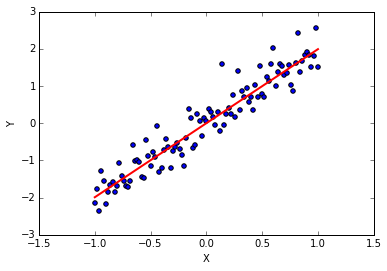

W value: 1.9907


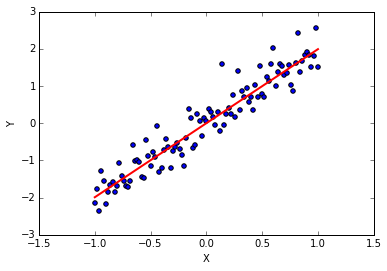

W value: 1.9907


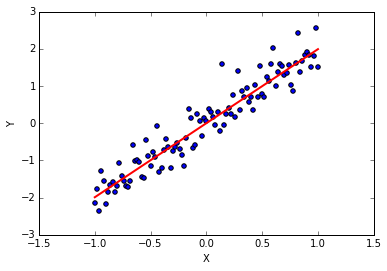

W value: 1.9907


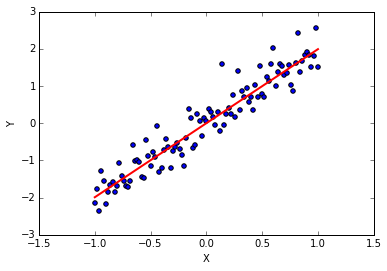

W value: 1.9907


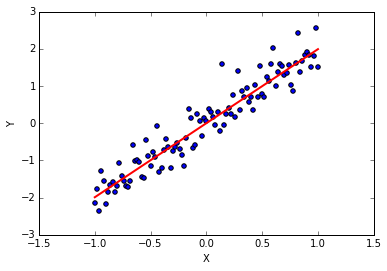

W value: 1.9907


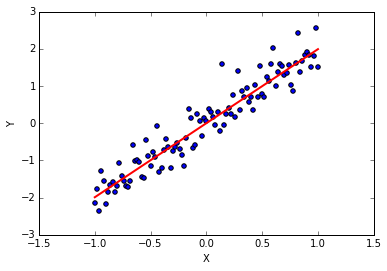

W value: 1.9907


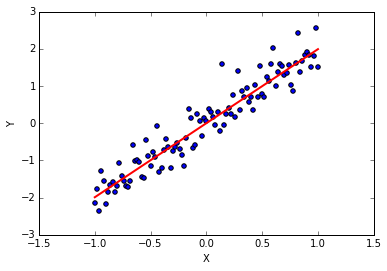

W value: 1.9907


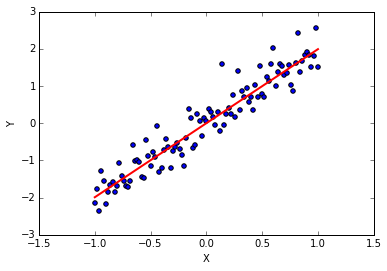

W value: 1.9907


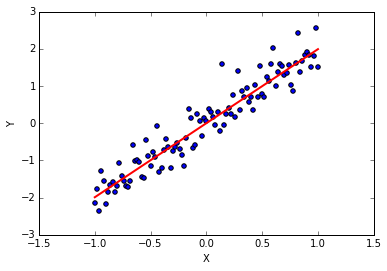

W value: 1.9907


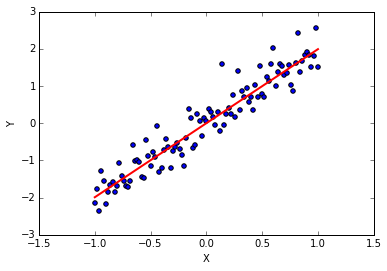

W value: 1.9907


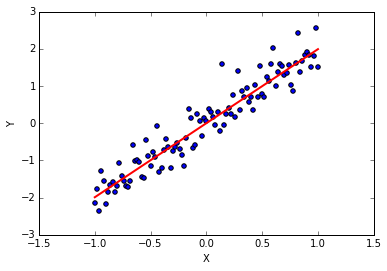

W value: 1.9907


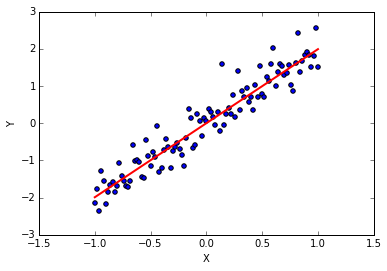

W value: 1.9907


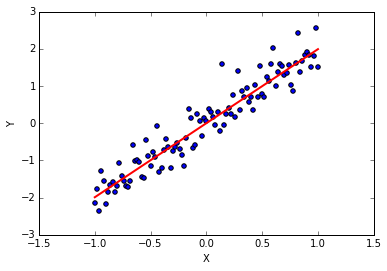

W value: 1.9907


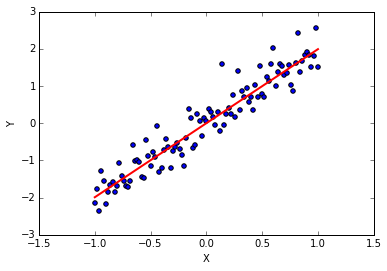

W value: 1.9907


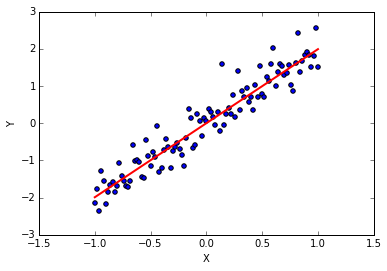

W value: 1.9907


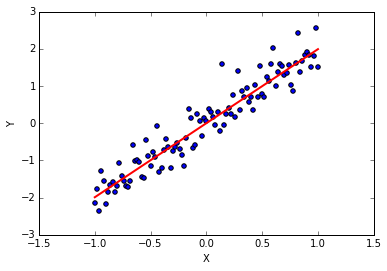

W value: 1.9907


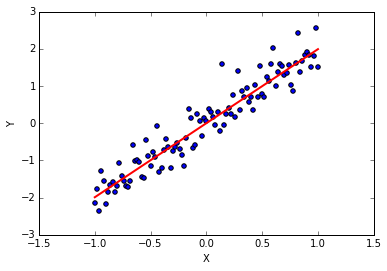

W value: 1.9907


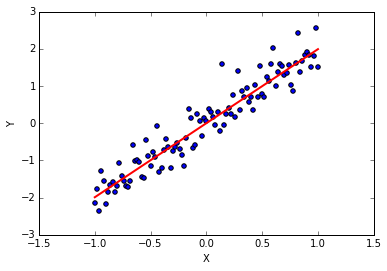

W value: 1.9907


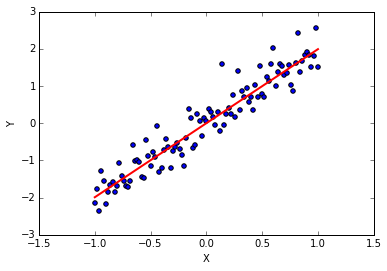

W value: 1.9907


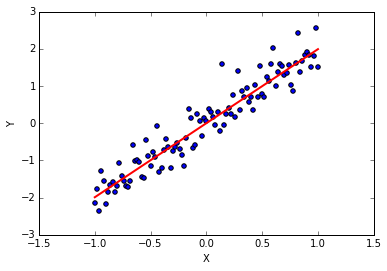

W value: 1.9907


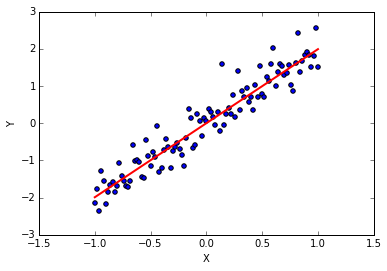

W value: 1.9907


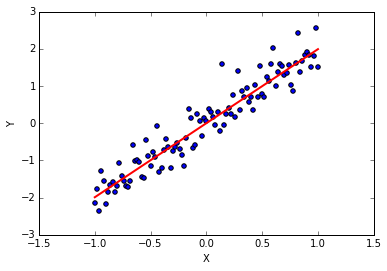

W value: 1.9907


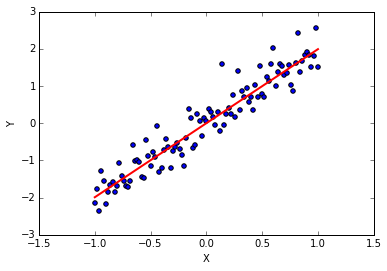

W value: 1.9907


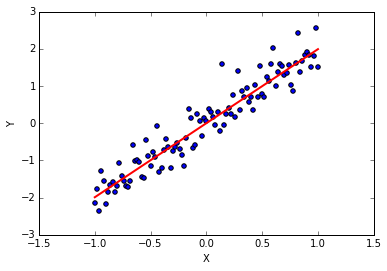

W value: 1.9907


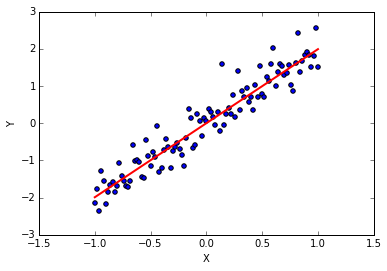

W value: 1.9907


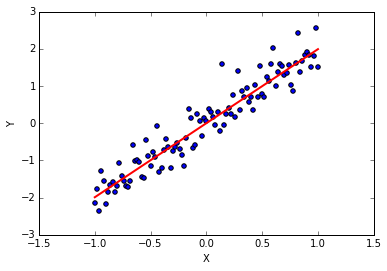

W value: 1.9907


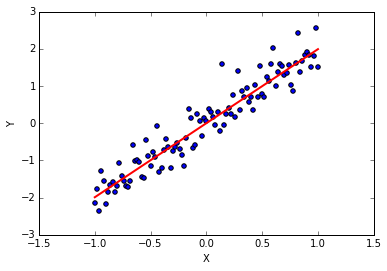

W value: 1.9907


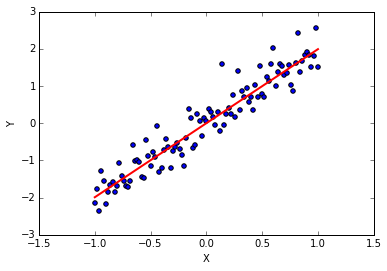

W value: 1.9907


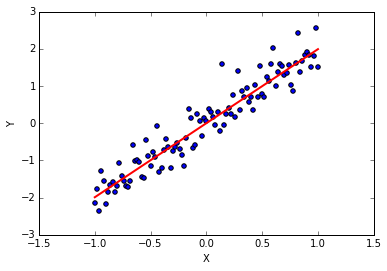

W value: 1.9907


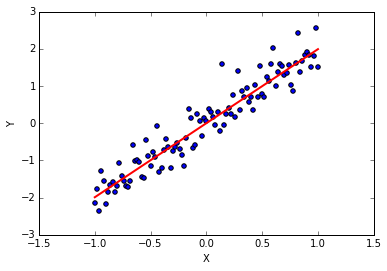

W value: 1.9907


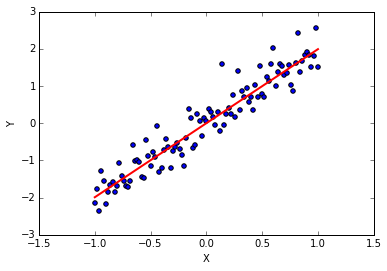

W value: 1.9907


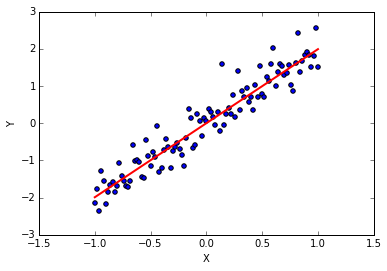

W value: 1.9907


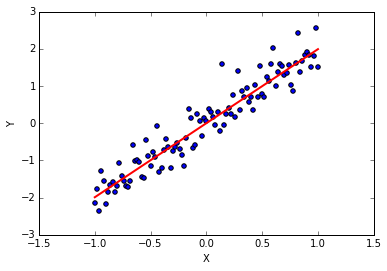

W value: 1.9907


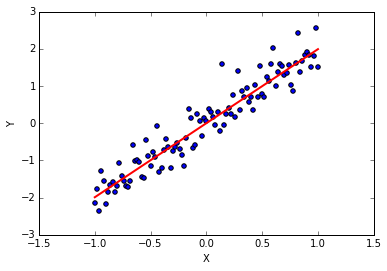

W value: 1.9907


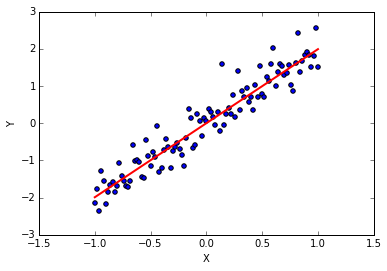

W value: 1.9907


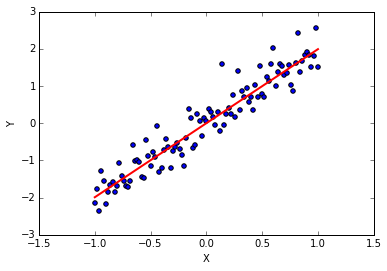

W value: 1.9907


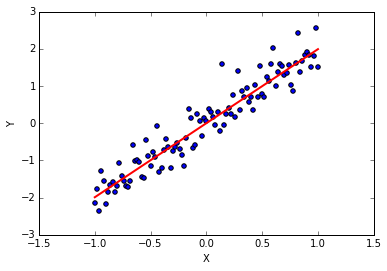

W value: 1.9907


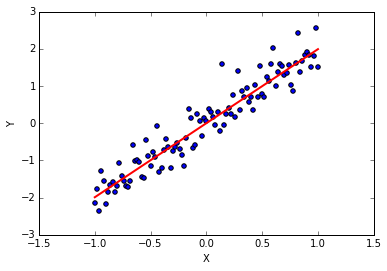

W value: 1.9907


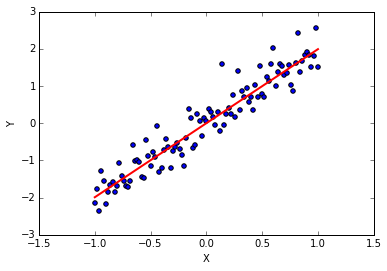

W value: 1.9907


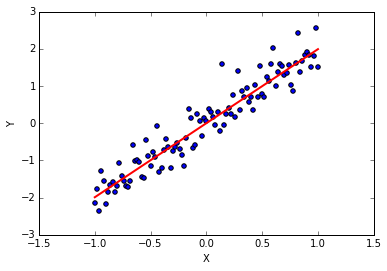

W value: 1.9907


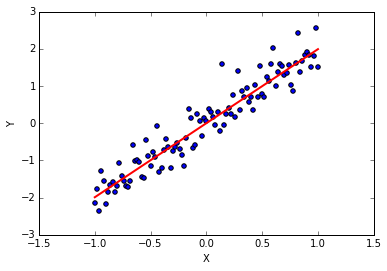

W value: 1.9907


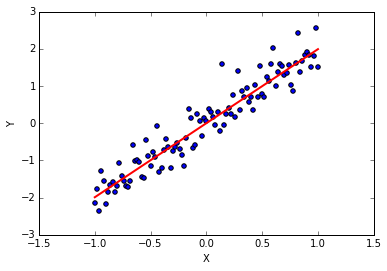

W value: 1.9907


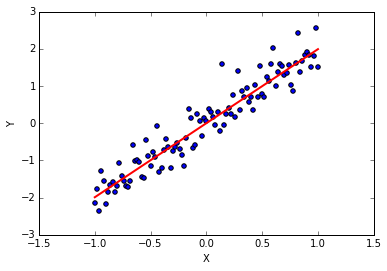

KeyboardInterrupt: 

In [2]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

import theano
from theano import tensor as T
import numpy as np
import matplotlib.pyplot as plt
import time

trX = np.linspace(-1, 1, 101)
trY = 2 * trX + np.random.randn(*trX.shape) * 0.33

def model (X, w):
    return X * w

X = T.scalar()
Y = T.scalar()

w = theano.shared(np.asarray(0., dtype=theano.config.floatX))
y = model(X, w)

cost = T.mean(T.sqr(y - Y))
gradient = T.grad(cost = cost, wrt = w)
updates = [[w, w - gradient * 0.01]]

train = theano.function(inputs = [X, Y], outputs = cost, updates = updates, allow_input_downcast = True)

plt.scatter(trX, trY, label='Training data and fitted linear regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
print 'W value: %.4f'%(0.0)

for i in range(100):
    for x, y in zip(trX, trY):
        train(x, y)
    plt.scatter(trX, trY, label='Training data and fitted linear regression')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.plot([trX[0], trX[100]], [w.get_value(0)*trX[0], w.get_value(0)*trX[100]], color='r', linestyle='-', linewidth=2)
    print 'W value: %.4f'%(w.get_value(0))
    plt.show()
    time.sleep(1)